<a href="https://colab.research.google.com/github/iamjatinjain/Deep-Learning_Convolutional-Neural-Network_Face-Mask-Detection/blob/main/Face%20Mask%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
main_dir = '/content/drive/MyDrive/Computer Vision/dataset'
train_dir = os.path.join(main_dir,'training')
test_dir = os.path.join(main_dir,'test')
valid_dir = os.path.join(main_dir,'valid')

train_mask_dir = os.path.join(train_dir,'Mask')
train_nomask_dir = os.path.join(train_dir,'Non Mask')


In [ ]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['0019.jpg', '0029.jpg', '0022.jpg', '0006.jpg', '0027.jpg', '0018.jpg', '0042.jpg', '0003.jpg', '0040.jpg', '0037.jpg']
['112.jpg', '124.jpg', '1.jpg', '13.jpg', '153.jpg', '117.jpg', '127.jpg', '122.jpg', '130.jpg', '145.jpg']


['/content/drive/MyDrive/Computer Vision/dataset/training/Mask/0019.jpg', '/content/drive/MyDrive/Computer Vision/dataset/training/Mask/0029.jpg', '/content/drive/MyDrive/Computer Vision/dataset/training/Mask/0022.jpg', '/content/drive/MyDrive/Computer Vision/dataset/training/Mask/0006.jpg', '/content/drive/MyDrive/Computer Vision/dataset/training/Mask/0027.jpg', '/content/drive/MyDrive/Computer Vision/dataset/training/Mask/0018.jpg', '/content/drive/MyDrive/Computer Vision/dataset/training/Mask/0042.jpg', '/content/drive/MyDrive/Computer Vision/dataset/training/Mask/0003.jpg']
['/content/drive/MyDrive/Computer Vision/dataset/training/Non Mask/112.jpg', '/content/drive/MyDrive/Computer Vision/dataset/training/Non Mask/124.jpg', '/content/drive/MyDrive/Computer Vision/dataset/training/Non Mask/1.jpg', '/content/drive/MyDrive/Computer Vision/dataset/training/Non Mask/13.jpg', '/content/drive/MyDrive/Computer Vision/dataset/training/Non Mask/153.jpg', '/content/drive/MyDrive/Computer Visi

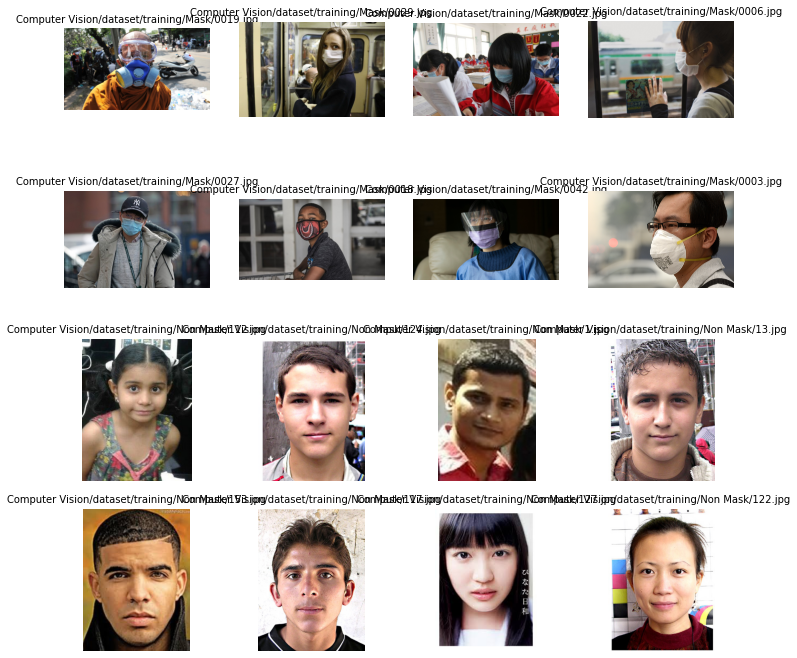

In [ ]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_pic = []
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic = []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)

merged_pics = mask_pic+nomask_pic

for i in range(0,len(merged_pics)):
  data = merged_pics[i].split('/',4)[4]
  sp = plt.subplot(4,4,i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_pics[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [ ]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator)

model.save(r'/content/drive/MyDrive/Computer Vision/mobilenet_v2.model')

Epoch 1/30
19/19 [==============================] - 510s 27s/step - loss: 5.9471 - accuracy: 0.4796 - val_loss: 0.6920 - val_accuracy: 0.5033
Epoch 2/30
19/19 [==============================] - 13s 717ms/step - loss: 0.6779 - accuracy: 0.5873 - val_loss: 0.6705 - val_accuracy: 0.5163
Epoch 3/30
19/19 [==============================] - 13s 712ms/step - loss: 0.6149 - accuracy: 0.6316 - val_loss: 0.5550 - val_accuracy: 0.8170
Epoch 4/30
19/19 [==============================] - 13s 717ms/step - loss: 0.4253 - accuracy: 0.8205 - val_loss: 0.3919 - val_accuracy: 0.8856
Epoch 5/30
19/19 [==============================] - 13s 703ms/step - loss: 0.4324 - accuracy: 0.8316 - val_loss: 0.4442 - val_accuracy: 0.8301
Epoch 6/30
19/19 [==============================] - 13s 702ms/step - loss: 0.3325 - accuracy: 0.8961 - val_loss: 0.3282 - val_accuracy: 0.9216
Epoch 7/30
19/19 [==============================] - 13s 694ms/step - loss: 0.3378 - accuracy: 0.8721 - val_loss: 0.2773 - val_accuracy: 0.9052


In [ ]:
 history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

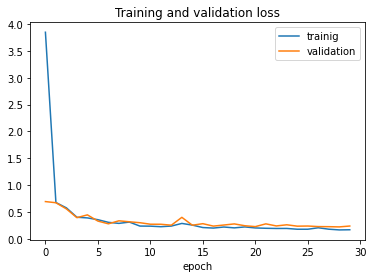

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['trainig','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

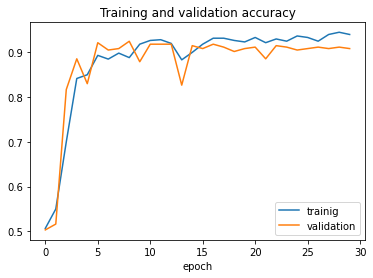

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['trainig','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

4/4 [==============================] - 35s 12s/step - loss: 0.1868 - accuracy: 0.9200
test acc :0.9200000166893005 test loss:0.18684592843055725


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img = image.load_img(img_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

Saving 1M.jpg to 1M.jpg
Saving 2NM.jpg to 2NM.jpg
Saving 3M.jpeg to 3M.jpeg
1M.jpg
mask
2NM.jpg
nomask
3M.jpeg
mask


In [ ]:
uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img = image.load_img(img_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

Saving 4M.jpg to 4M.jpg
4M.jpg
nomask


In [ ]:
uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img = image.load_img(img_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

Saving 5M.png to 5M.png
Saving 6M.png to 6M.png
5M.png
mask
6M.png
mask


In [ ]:
uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img = image.load_img(img_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

Saving 3M.jpeg to 3M (1).jpeg
3M.jpeg
mask


In [ ]:
uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img = image.load_img(img_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

Saving 7M.png to 7M.png
Saving 8M.png to 8M.png
7M.png
nomask
8M.png
nomask


In [ ]:
uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img = image.load_img(img_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

Saving 13M.png to 13M.png
13M.png
mask


In [ ]:
uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img = image.load_img(img_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

Saving 15.png to 15.png
15.png
nomask


In [ ]:
uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img = image.load_img(img_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

Saving 14M.png to 14M.png
14M.png
mask


In [ ]:
uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img = image.load_img(img_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

Saving 3M.jpeg to 3M.jpeg
3M.jpeg
mask


In [ ]:
uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img = image.load_img(img_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

Saving 3M.jpeg to 3M.jpeg
3M.jpeg
mask


In [ ]:
uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img = image.load_img(img_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

Saving 15.png to 15.png
15.png
nomask


In [ ]:
uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img = image.load_img(img_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

Saving 1M.jpg to 1M.jpg
Saving 2NM.jpg to 2NM.jpg
Saving 3.png to 3.png
1M.jpg
mask
2NM.jpg
nomask
3.png
nomask


In [ ]:
uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img = image.load_img(img_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

Saving 1M.jpg to 1M (1).jpg
Saving 2NM.jpg to 2NM (1).jpg
Saving 3M.png to 3M.png
1M.jpg
mask
2NM.jpg
nomask
3M.png
nomask


In [ ]:
import matplotlib.image as mpimg

mask


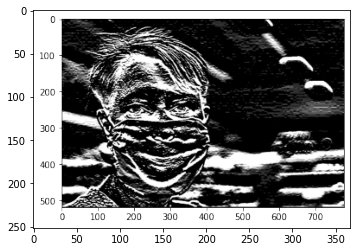

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

imag_pred = image.load_img("/content/drive/MyDrive/Computer Vision/13M.png", target_size=(150, 150))

imag_pred = image.img_to_array(imag_pred)
imag_pred = np.expand_dims(imag_pred, axis= 0)

result = model.predict(imag_pred)
#print(result)
if result ==0:
    print('mask')
else:
    print('nomask')

img1 = mpimg.imread('/content/drive/MyDrive/Computer Vision/14M.png')
imgplt = plt.imshow(img1)
plt.show()


In [ ]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

4/4 [==============================] - 1s 230ms/step - loss: 0.1750 - accuracy: 0.9200
test acc :0.9200000166893005 test loss:0.17502941191196442
